In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# EDA (Exploratory Data Analysis)
#### First we will load in a CSV from Kaggle on the California Housing Prices, then see if the median_house_value variable has a long tail.

In [2]:
df = pd.read_csv(r'C:\Users\l676907\OneDrive - Cargill Inc\Desktop\ML_Zoomcamp\week-2\housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### It turns out the median_house_value does inded have a long tail.

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

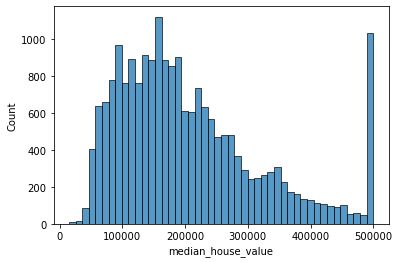

In [3]:
sns.histplot(df.median_house_value)

# Features
#### We will only need the following columns: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value

In [4]:
base = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
df = df[base]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Quesiton 1
#### Find a feature with missing values. How many missing values does it have?

#### Below we see the total_bedrooms feature is the only feature with missing values and it has 207 missing values.

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2
#### What's the median for the variable 'population'?
#### Below we see the median for the 'population' feature is 1,166

In [6]:
df.population.median()

1166.0

# Split the data
- #### Shuffle the initial dataset using seed 42.
- #### Split your data into training/validation/testing sets, with a distribution of 60/20/20.
- #### Make sure that the target value (median_house_value) is not in your dataframe.
- #### Apply the log transformation to the median_house_value variable using the '.np.log1p()' function

In [7]:
# Create split for training, validation, testing distribution.
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [8]:
# Create variables to shuffle data set, using seed = 42.
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [9]:
# Split the original dataset into training, validation, and testing sets.
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [10]:
# Reset index for each data set.
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
# Create target variable for data sets.
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [12]:
# Remove target variable from data sets.
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3
- #### We need to deal with missing values for the column from Q1.
- #### We have two options: fill it with 0 or with the mean of this variable.
- #### Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- #### For computing the mean, use the training data only!
- #### Use the validation dataset to evaluate the models and compare the RMSE of each option.
- #### Round the RMSE scores to 2 decimal places using 'round(score, 2)'
- #### Which option gives better RMSE?

# Part 1: Fill missing values of total_bedrooms with 0
#### First we will train a linear regression model on the dataset by filling in the missing values in the total_bedrooms column with 0.

In [13]:
def prepare_X(df, fill_nulls):
    df_num = df
    df_num = df_num.fillna(fill_nulls)
    X = df_num.values
    return X

In [14]:
# Linear regression function from lessons
def train_lin_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [15]:
# Root mean squared error function from lessons
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [16]:
# Fill in missing values with 0 and train dataset
df_train_zeroes = prepare_X(df_train, 0)
w0_zeroes, w_zeroes = train_lin_reg(df_train_zeroes, y_train)

# Validate dataset
X_val_zeroes = prepare_X(df_val, 0)
y_pred_zeroes = w0_zeroes + X_val_zeroes.dot(w_zeroes)

# Compute root mean squared error
rmse(y_val, y_pred_zeroes)

0.32953303652286825

# Part 2: Fill in missing values with the mean value
#### Now we will train a linear regression model on the dataset by filling in missing values in the total_bedrooms column with the mean value.

In [17]:
df_train_mean = prepare_X(df_train, df_train.total_bedrooms.mean())

In [18]:
# Fill in missing values with the mean of total_bedrooms and train dataset
df_train_mean = prepare_X(df_train, 0)
w0_mean, w_mean = train_lin_reg(df_train_mean, y_train)

# Validate dataset
X_val_mean = prepare_X(df_val, df_train.total_bedrooms.mean())
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

# Compute root mean squared error
rmse(y_val, y_pred_mean)

0.32953303652286825

#### We see both methods of filling in missing values are equally valid.

# Question 4
- #### Now let's train a regularized linear regression.
- #### For this question, fill the NA's with 0.
- #### Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- #### Use RMSE to evaluate the model on the validation dataset.
- #### Round the RMSE scores to 2 decimal digits.
- #### Which r gives the best RMSE?
#### If there are multiple options, select the smallest r:
- #### 0
- #### 0.000001
- #### 0.001
- #### 0.0001

In [19]:
# This variable already has missing values filled in with 0.
df_train_zeroes

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [20]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [21]:
# Linear regression function with regularization from lessons
def train_lin_reg_regularized(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [22]:
def r_comparison():
    compare = {}
    df_train_zeroes = prepare_X(df_train, 0)
    for r in r_list:
        w0_zeroes, w_zeroes = train_lin_reg_regularized(df_train_zeroes, y_train, r)
        X_val_zeroes = prepare_X(df_val, 0)
        y_pred_zeroes = w0_zeroes + X_val_zeroes.dot(w_zeroes)
        compare[r] = np.round(rmse(y_val, y_pred_zeroes), 2)

    return compare

In [23]:
r_comparison()

{0: 0.33,
 1e-06: 0.33,
 0.0001: 0.33,
 0.001: 0.33,
 0.01: 0.33,
 0.1: 0.33,
 1: 0.33,
 5: 0.34,
 10: 0.34}

#### Out of the options above, we say 0 is the correct answer.

# Question 5:
- #### We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- #### Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
- #### For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- #### Fill the missing values with 0 and train the model on the validation dataset and collect the RMSE scores.
- #### What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- #### Round the result to 3 decimal digits (round(std, 3)).

#### Note: standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

#### Options:
- #### 0.16
- #### 0.00005
- #### 0.005
- #### 0.15555

In [24]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
def seed_compare(seed_list):
    scores = []
    for seed in seed_list:
        # Create variables to shuffle data set, using seeds from the list given.
        idx = np.arange(n)
        np.random.seed(seed)
        np.random.shuffle(idx)

        # Split the original dataset into training, validation, and testing sets.
        df_train = df.iloc[idx[:n_train]].copy()
        df_val = df.iloc[idx[n_train:n_train + n_val]].copy()
        df_test = df.iloc[idx[n_train + n_val:]].copy()

        # Reset index for each data set.
        df_train = df_train.reset_index(drop=True)
        df_val = df_val.reset_index(drop=True)
        df_test = df_test.reset_index(drop=True)

        # Create target variable for data sets.
        y_train = np.log1p(df_train.median_house_value.values)
        y_val = np.log1p(df_val.median_house_value.values)
        y_test = np.log1p(df_test.median_house_value.values)

        # Remove target variable from data sets.
        del df_train['median_house_value']
        del df_val['median_house_value']
        del df_test['median_house_value']
    
        # Fill in missing values with 0 in validation dataset
        X_train = prepare_X(df_train, fill_nulls=0)
        w0, w = train_lin_reg(X_train, y_train)

        # Validate dataset with testing dataset
        X_val = prepare_X(df_val, fill_nulls=0)
        y_pred = w0 + X_val.dot(w)

        # Compute root mean squared error
        rmse_vals = np.round(rmse(y_val, y_pred), 2)
        scores.append(rmse_vals)

    return scores

In [26]:
round(np.std(seed_compare(seeds)), 3)

0.005

#### We see that the answer is that the list of seeds gives us a standard deviation of 0.005

# Question 6:
- #### Split the dataset like previously, use seed 9
- #### Combine train and validation datasets.
- #### FIll the missing values with 0 and train a model with r=0.001.
- #### What's the RMSE on the test dataset?

#### Options:
- #### 0.35
- #### 0.135
- #### 0.450
- #### 0.245

In [27]:
def full_train():
    # Create variables to shuffle data set, using seeds from the list given.
    idx = np.arange(n)
    np.random.seed(9)
    np.random.shuffle(idx)

    # Split the original dataset into training, validation, and testing sets.
    df_train = df.iloc[idx[:n_train]].copy()
    df_val = df.iloc[idx[n_train:n_train + n_val]].copy()
    df_test = df.iloc[idx[n_train + n_val:]].copy()

    # Reset index for each data set.
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    # Create target variable for data sets.
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    # Remove target variable from data sets.
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    # Combine the training and validation datasets
    df_full_train = pd.concat([df_train, df_val])
    df_full_train = df_full_train.reset_index(drop=True)
    y_full_train = np.concatenate([y_train, y_val])
    
    # Fill in missing values with 0 in full train dataset
    X_full_train = prepare_X(df_full_train, fill_nulls=0)
    w0, w = train_lin_reg_regularized(X_full_train, y_full_train, r=0.001)

    # Validate dataset with testing dataset
    X_test = prepare_X(df_test, fill_nulls=0)
    y_pred = w0 + X_test.dot(w)

    # Compute root mean squared error
    rmse_val = np.round(rmse(y_test, y_pred), 2)

    return rmse_val

In [28]:
full_train()

0.35

#### We see the RMSE on the full train dataset is 0.35